### This notebook is used for visualizing different images with their respective bounding boxes (For different annotation techniques)

In [1]:
import cv2
import matplotlib.pyplot as plt

#### Visualizing for dataset from datasetsninja.com
The dataset labels are in COCO format, used in COCO dataset

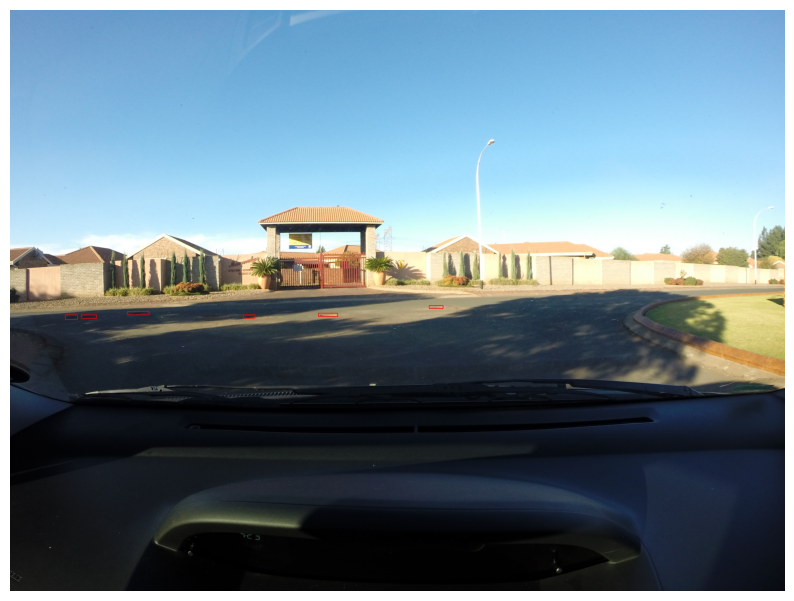

In [2]:
# Step 1: Read the annotation file
image = 'G0010033'
annotation_file = "../data/Dataset 1 (Simplex)/simpleTrainFullPhotosSortedFullAnnotations.txt"
image_name = f"{image}.JPG"
image_path = f"../data/Dataset 1 (Simplex)/Train data/Positive data/{image_name}"

# Step 2: Find the corresponding line in the annotation file
with open(annotation_file, 'r') as file:
    lines = file.readlines()

# Extract the line that contains the target image (even though in .txt it's .bmp)
target_line = [line for line in lines if image in line][0]

# Step 3: Parse the data from the line
parts = target_line.strip().split()

# Number of potholes
num_potholes = int(parts[3])

# Extract bounding boxes (4 values for each pothole)
bboxes = []
for i in range(num_potholes):
    x_center = int(parts[4 + i * 4])
    y_center = int(parts[5 + i * 4])
    width = int(parts[6 + i * 4])
    height = int(parts[7 + i * 4])
    bboxes.append((x_center, y_center, width, height))

# Step 4: Load the image (now in .jpg format)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 5: Draw the bounding boxes
for (x, y, w, h) in bboxes:
    x1 = x
    y1 = y
    x2 = x + w
    y2 = y + h
    
    # Draw the bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Step 6: Show the image with bounding boxes
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.show()


#### Visualizing from yolo format
Replace with your image and yolo label paths

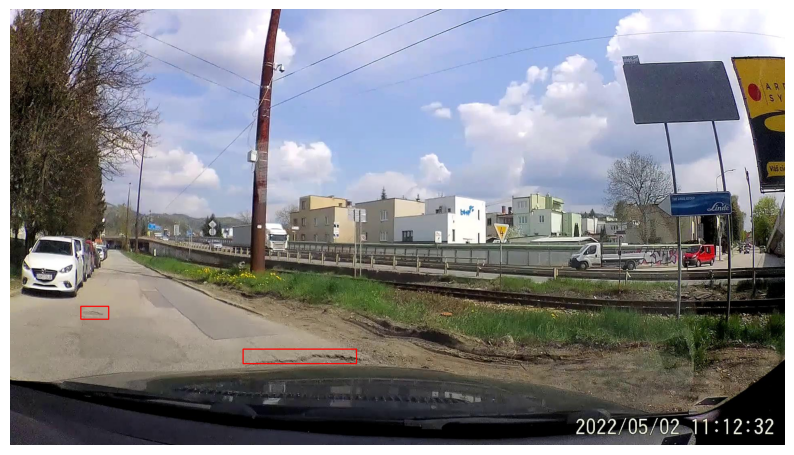

In [3]:
image_path = "../yolo_data/val/images/Vid_1_Ca_00000003.JPG"
label_path = "../yolo_data/val/labels/Vid_1_Ca_00000003.txt"

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_height, image_width, _ = image.shape

with open(label_path, 'r') as file:
    lines = file.readlines()

# Draw bounding boxes on the image
for line in lines:
    class_id, x_center, y_center, width, height = map(float, line.strip().split())

    # Convert YOLO format to pixel coordinates
    x_center = x_center * image_width
    y_center = y_center * image_height
    width = width * image_width
    height = height * image_height

    x1 = int(x_center - width/2)
    y1 = int(y_center - height/2)
    x2 = int(x_center + width/2)
    y2 = int(y_center + height/2)

    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.show()